Epoch 1/20
79/79 [==============================] - 22s 229ms/step - loss: 0.5927 - accuracy: 0.6887 - val_loss: 0.5314 - val_accuracy: 0.7320
Epoch 2/20
79/79 [==============================] - 19s 247ms/step - loss: 0.5084 - accuracy: 0.7438 - val_loss: 0.5188 - val_accuracy: 0.7370
Epoch 3/20
79/79 [==============================] - 17s 217ms/step - loss: 0.4774 - accuracy: 0.7692 - val_loss: 0.5150 - val_accuracy: 0.7455
Epoch 4/20
79/79 [==============================] - 17s 216ms/step - loss: 0.4577 - accuracy: 0.7796 - val_loss: 0.5182 - val_accuracy: 0.7430
Epoch 5/20
79/79 [==============================] - 20s 251ms/step - loss: 0.4376 - accuracy: 0.7913 - val_loss: 0.5146 - val_accuracy: 0.7340
Epoch 6/20
79/79 [==============================] - 17s 214ms/step - loss: 0.4149 - accuracy: 0.8057 - val_loss: 0.5292 - val_accuracy: 0.7340
Epoch 7/20
79/79 [==============================] - 19s 246ms/step - loss: 0.3956 - accuracy: 0.8166 - val_loss: 0.5222 - val_accuracy: 0.7440

<Axes: >

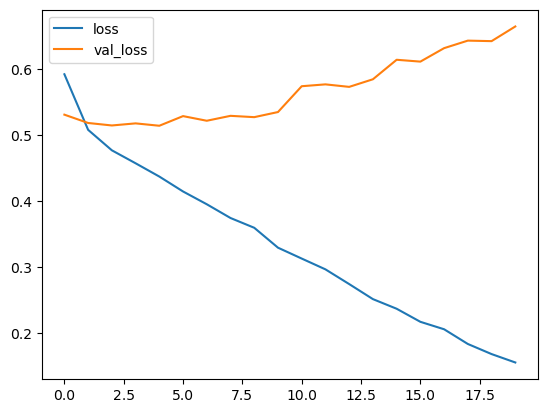

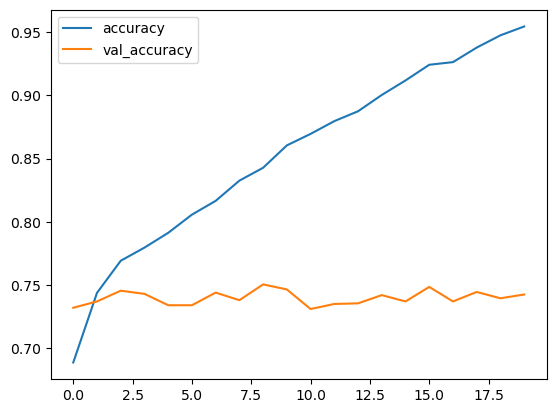

In [6]:
# Question 2b
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

# 1. Load CIFAR-10 image dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 2. Filter training set to retain images of cats and dogs
mask_train = np.isin(y_train, [3, 5]).flatten()
X_train = X_train[mask_train]
y_train = y_train[mask_train]

# 3. Filter test set to retain images of cats and dogs
mask_test = np.isin(y_test, [3, 5]).flatten()
X_test = X_test[mask_test]
y_test = y_test[mask_test]

# 4. Convert cat labels from 3 to 0 and dog labels from 5 to 1
y_train = np.where(y_train == 3, 0, 1)
y_test = np.where(y_test == 3, 0, 1)

# Normalization of features for better performance
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

# 5. Create Keras DenseNet121 model with customized params
dn121 = keras.applications.DenseNet121(include_top=False, input_shape=(32, 32, 3))

# 6. Set the DenseNet model’s layers to be non-trainable
for layer in dn121.layers:
    layer.trainable = False

# 7. Create, compile and train the keras model
model = keras.Sequential([
    dn121,
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_test, y_test))
# model.summary()

# 8. Plot the training history of loss and accuracy
history_df = pd.DataFrame(model.history.history)
# display(history_df) 
print(history_df.tail(5).mean())
history_df.plot(y=["loss","val_loss"])
history_df.plot(y=["accuracy","val_accuracy"])

Epoch 1/20
79/79 [==============================] - 23s 236ms/step - loss: 0.2550 - accuracy: 0.8915 - val_loss: 0.2061 - val_accuracy: 0.9130
Epoch 2/20
79/79 [==============================] - 17s 219ms/step - loss: 0.1728 - accuracy: 0.9320 - val_loss: 0.2066 - val_accuracy: 0.9150
Epoch 3/20
79/79 [==============================] - 17s 222ms/step - loss: 0.1548 - accuracy: 0.9398 - val_loss: 0.1898 - val_accuracy: 0.9220
Epoch 4/20
79/79 [==============================] - 17s 220ms/step - loss: 0.1392 - accuracy: 0.9468 - val_loss: 0.1873 - val_accuracy: 0.9210
Epoch 5/20
79/79 [==============================] - 17s 216ms/step - loss: 0.1244 - accuracy: 0.9516 - val_loss: 0.1824 - val_accuracy: 0.9205
Epoch 6/20
79/79 [==============================] - 17s 217ms/step - loss: 0.1116 - accuracy: 0.9571 - val_loss: 0.1802 - val_accuracy: 0.9290
Epoch 7/20
79/79 [==============================] - 17s 219ms/step - loss: 0.0991 - accuracy: 0.9623 - val_loss: 0.1827 - val_accuracy: 0.9245

<Axes: >

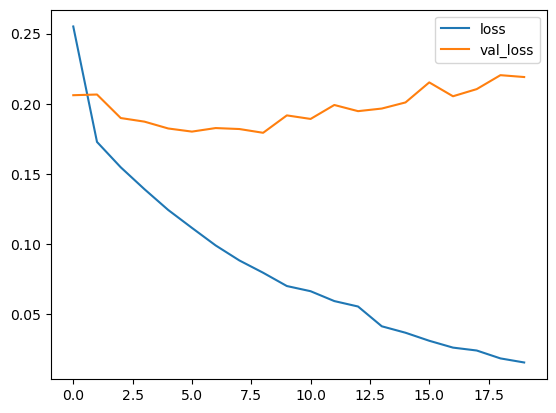

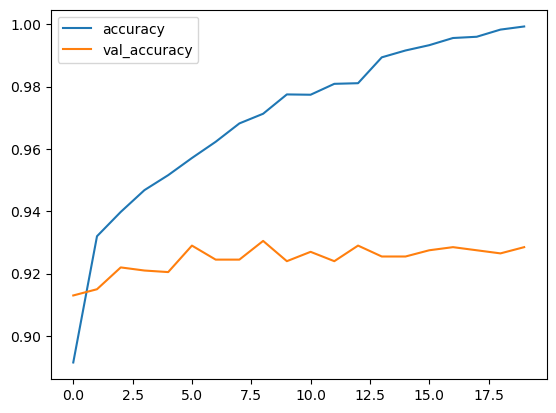

In [7]:
# Question 2c
# Same set of codes as Question 2b, except #1 and #2
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 1. Filter training set and test set to retain image of aeroplanes and cats
mask_train = np.isin(y_train, [0, 3]).flatten()
X_train = X_train[mask_train]
y_train = y_train[mask_train]
mask_test = np.isin(y_test, [0, 3]).flatten()
X_test = X_test[mask_test]
y_test = y_test[mask_test]

# 2. Convert cat labels from 3 to 0 and aeroplane labels from 0 to 1
y_train = np.where(y_train == 3, 0, 1)
y_test = np.where(y_test == 3, 0, 1)

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

dn121 = keras.applications.DenseNet121(include_top=False, input_shape=(32, 32, 3))
for layer in dn121.layers:
    layer.trainable = False
model = keras.Sequential([
    dn121,
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_test, y_test))
# display(history_df) 
history_df = pd.DataFrame(model.history.history)
print(history_df.tail(5).mean())
history_df.plot(y=["loss","val_loss"])
history_df.plot(y=["accuracy","val_accuracy"])

##### Question 2c

Based on the statistic summary and graphs completed in question 2b and 2c, accuracies in part(c) (validation accuracy: around 0.93) are greater than that of accuracies in part(b) (validation accuracy: around 0.73) under the same model and data set (for cats).

Both are binary classification. The reason for the difference is that in part(b) the model is trained to distinguish between cats and dogs but in part(c) the model is trained to distinguish between cats and aeroplanes.

Both cats and dogs are living organisms (mammals) and they share certain degree(s) of similarity in features biologically (e.g. 4 legs, a head, a nose). Our model is required to distinguish from the subtle feature/pattern difference, meaning that the difficulty is high.

On the other hand, aeroplanes are artificial and there are various difference and also degree of difference between cats and aeroplanes. They are easy to be spot out by human beings as well as our model. (like the "Spot the difference" game)

In addition, based on probability theory, given the there are many different features/patterns between cats and aeroplanes, the probability of distinguishing the wrong answer is much lower given that you find a bunch of pattern differences in the image set.

As a result, accuracies in part(c) is much greater than that of part(b).

Epoch 1/40
52/52 [==============================] - 18s 323ms/step - loss: 2.9799 - accuracy: 0.0898 - val_loss: 2.9118 - val_accuracy: 0.1783
Epoch 2/40
52/52 [==============================] - 17s 320ms/step - loss: 2.6783 - accuracy: 0.1561 - val_loss: 2.5797 - val_accuracy: 0.1464
Epoch 3/40
52/52 [==============================] - 15s 284ms/step - loss: 2.3111 - accuracy: 0.2527 - val_loss: 2.2151 - val_accuracy: 0.2683
Epoch 4/40
52/52 [==============================] - 14s 270ms/step - loss: 1.9860 - accuracy: 0.3467 - val_loss: 2.0013 - val_accuracy: 0.3398
Epoch 5/40
52/52 [==============================] - 14s 271ms/step - loss: 1.7681 - accuracy: 0.4266 - val_loss: 1.8583 - val_accuracy: 0.3933
Epoch 6/40
52/52 [==============================] - 13s 256ms/step - loss: 1.5800 - accuracy: 0.4779 - val_loss: 1.7822 - val_accuracy: 0.4266
Epoch 7/40
52/52 [==============================] - 14s 265ms/step - loss: 1.4448 - accuracy: 0.5162 - val_loss: 1.6731 - val_accuracy: 0.4666

<Axes: >

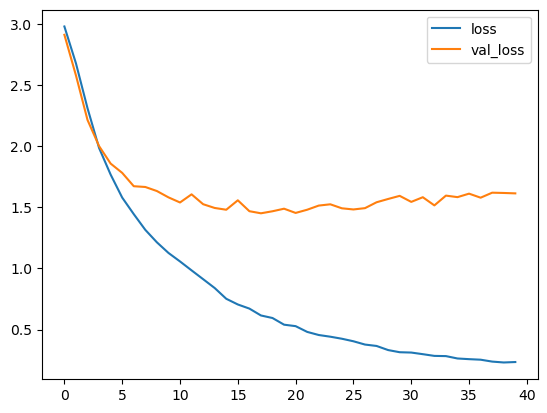

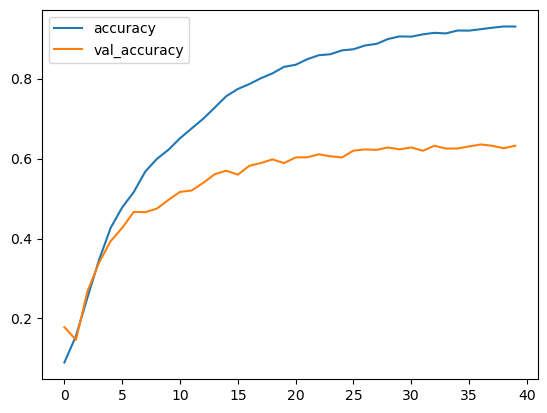

In [2]:
# Question 3b
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing import text

# Default constant values
NUM_WORDS = 5000
#MAX_LEN = 200 can lead to ~0.7 validation accuracy
MAX_LEN = 100
WV_SIZE = 64

# 1. Load all 20 newsgroups message dataset
newsgroups = fetch_20newsgroups(subset="all")
# print(newsgroups.data[0], newsgroups.target[0])
# print(type(newsgroups.data), type(newsgroups.target))

# 2. Data preprocessing
X = [text.one_hot(t, NUM_WORDS) for t in newsgroups.data]
y = keras.utils.to_categorical(newsgroups.target, 20)

# 3. Split the dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 4. Add Padding of the words in train set and test set to standardized length
X_train = sequence.pad_sequences(X_train, maxlen=MAX_LEN) 
X_test = sequence.pad_sequences(X_test, maxlen=MAX_LEN)

# 5. Create the LSTM, a type of CNN model 
model = keras.Sequential([
    layers.Embedding(NUM_WORDS, WV_SIZE, input_length=MAX_LEN), 
    layers.LSTM(64, dropout=0.5),
    layers.Dense(20, activation="softmax")
])

# 6. Compile and train the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=40, batch_size=256, verbose=1, validation_data=(X_test, y_test))

# 7. Plot the training history of loss and accuracy. 
history_df = pd.DataFrame(model.history.history)
# display(history_df) 
print(history_df.tail(5).mean())
history_df.plot(y=["loss","val_loss"])
history_df.plot(y=["accuracy","val_accuracy"])

##### Some setting results
1. 64 units, batch_size = 256, epochs = 40
loss            0.221517
accuracy        0.931474
val_loss        1.741032
val_accuracy    0.619986
2. 128 units, batch_size = 256, epochs = 40
loss            0.190971
accuracy        0.941434
val_loss        1.660464
val_accuracy    0.642554

In [4]:
# Question 3c
from tensorflow.keras.preprocessing import text

# Default constant values
NUM_WORDS = 5000
MAX_LEN = 100

# Function to categorize phrases
def newsgroup_category(str_phrase):
    X = [text.one_hot(str_phrase, NUM_WORDS)]
    X = sequence.pad_sequences(X, maxlen=MAX_LEN)
    result_prob = model.predict(X)
    # max_prob = result_prob.max()
    max_prob_index = result_prob.argmax()
    return newsgroups.target_names[max_prob_index]

# Examples
phrase1 = "i buy a great car"
phrase2 = "i buy an nvidia gpu"
phrase3 = "i buy a graphics card"

# Results
print(phrase1, "category:", newsgroup_category(phrase1))
print(phrase2, "category:", newsgroup_category(phrase2))
print(phrase3, "category:", newsgroup_category(phrase3))

1/1 [==============================] - 0s 25ms/step
i buy a great car category: rec.autos
1/1 [==============================] - 0s 21ms/step
i buy an nvidia gpu category: comp.graphics
1/1 [==============================] - 0s 20ms/step
i buy a graphics card category: comp.graphics


#### Question 3c Remarks
Unlike phrase1 and phrase3,
For phrase2 "i buy an nvidia gpu", the category is not certain.
I rebuilt the model several times, the category for the phrase 2 may vary.
I think it is acceptable since the accuracy of the model is around 62% only. Due to time constraint, I am not going to improve my model.